# Part One
## Use the "Stock_px" dataset and address the following functions:

1. Draw line plot for each of the stocks separately/individually - 2 points
2. Draw line, scatter, box plot for each of the stocks within the same subplot - 2 points
3. Draw a linear regression model fit for apple stock - 2 points
4. Draw a dotted line plot for SPX and mark all the peak points at various timesteps - 2 points
5. Using Seaborn plot pairwise.  - 2 points



###### Number 1
I used .head() to read the first few lines of the new stock_px_df dataframe. I see the stock columns did include their headers, but the Date column is 'unnamed: 0' so I change that to a cleaner 'Date' name with the .rename() function. By setting the Date column to a pandas datetime format, it will now be easier to work with. Then, a copy of the first 10 rows are made into a seperate dataframe for testing.

In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# Using a relative path to access the data file
stock_px_df = pd.read_csv('data/stock_px.csv')
stock_px_df.rename(columns = {'Unnamed: 0':'Date'}, inplace=True)
stock_px_df['Date'] = pd.to_datetime(stock_px_df['Date'])
line_test = (stock_px_df.head(10)).copy()
line_test



,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02,7.40,21.11,29.22,909.03
1,2003-01-03,7.45,21.14,29.24,908.59
2,2003-01-06,7.45,21.52,29.96,929.01
3,2003-01-07,7.43,21.93,28.95,922.93
4,2003-01-08,7.28,21.31,28.83,909.93
5,2003-01-09,7.34,21.93,29.44,927.57
6,2003-01-10,7.36,21.97,29.03,927.57
7,2003-01-13,7.32,22.16,28.91,926.26
8,2003-01-14,7.30,22.39,29.17,931.66
9,2003-01-15,7.22,22.11,28.77,918.22


In order to keep consistency in all the graphs, I build a function that will take in the stock's tickers as arguments. Below is the test model.

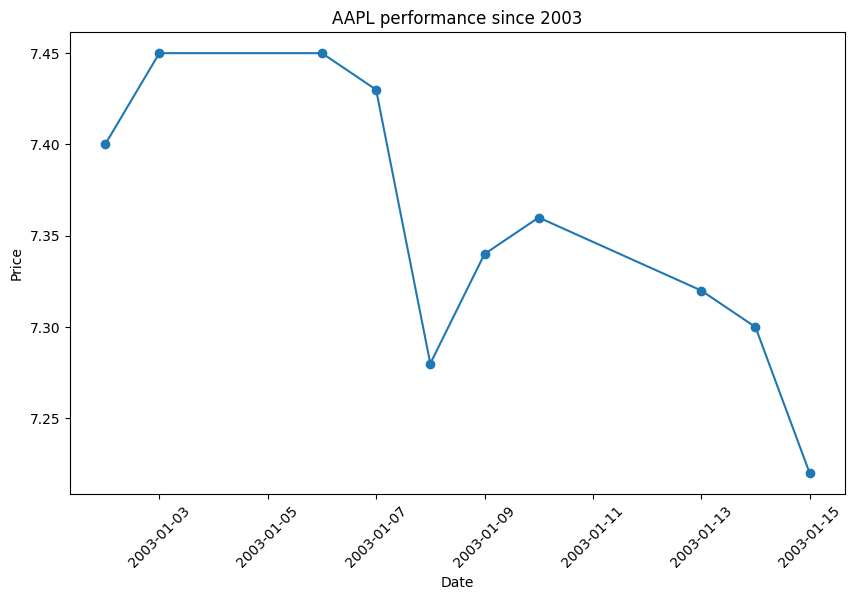

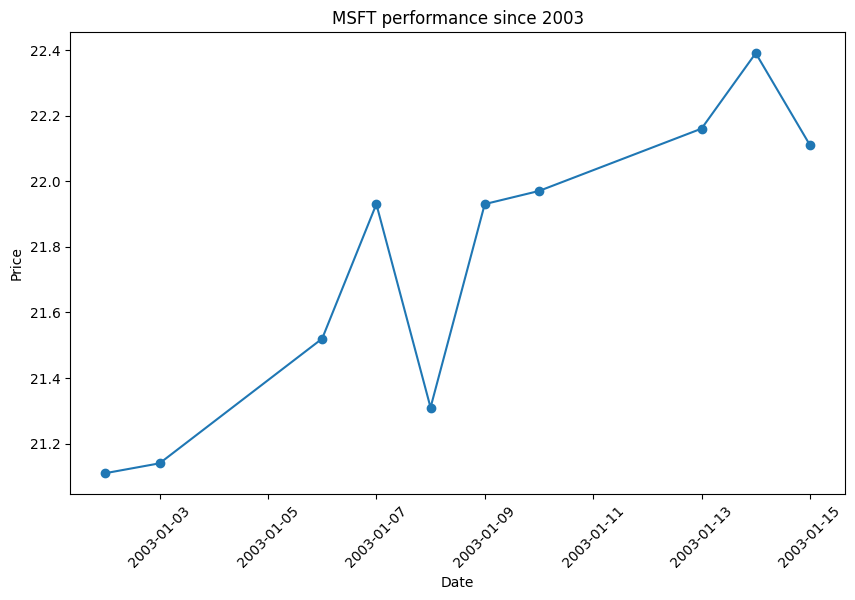

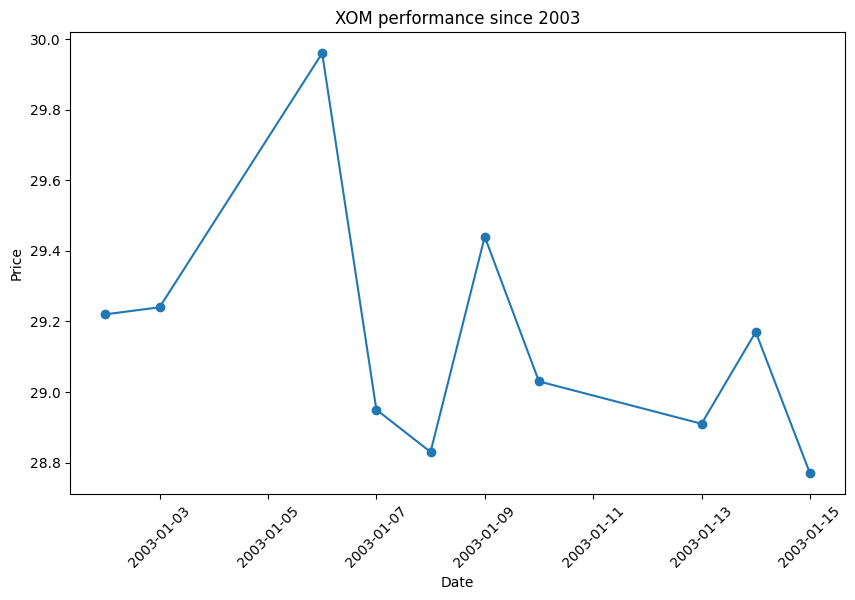

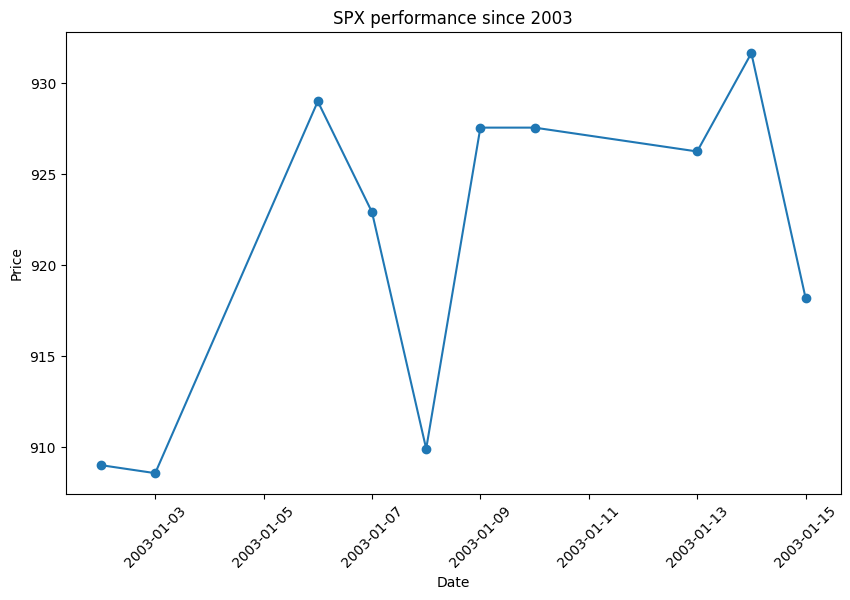

In [79]:
def graph_stocks_test(*tickers):
    for ticker in tickers:
        ticker = ticker.upper()
    
    
        plt.figure(figsize=(10,6))
        plt.plot(line_test['Date'], line_test[ticker], marker='o')
        plt.title(ticker + " performance since 2003")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.xticks(rotation=45)
        plt.show()


graph_stocks_test('AAPL','MSFT','XOM','SPX')
    

Now, I will apply the real function to the complete dataset. The tickers are entered as arguments to display their own graph independently. The AutoLocator class helped pick ticks and their labels. I added specific x- and y-limits so that the graph started in the bottom left. The y-limits are +-1 to give some padding on the graph borders.

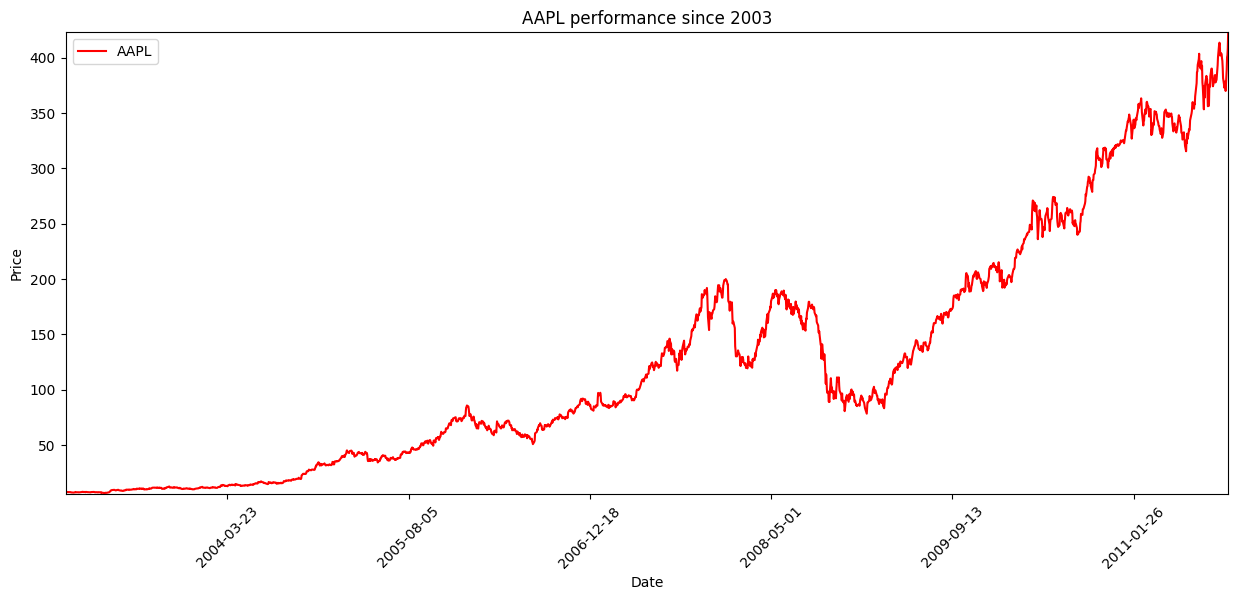

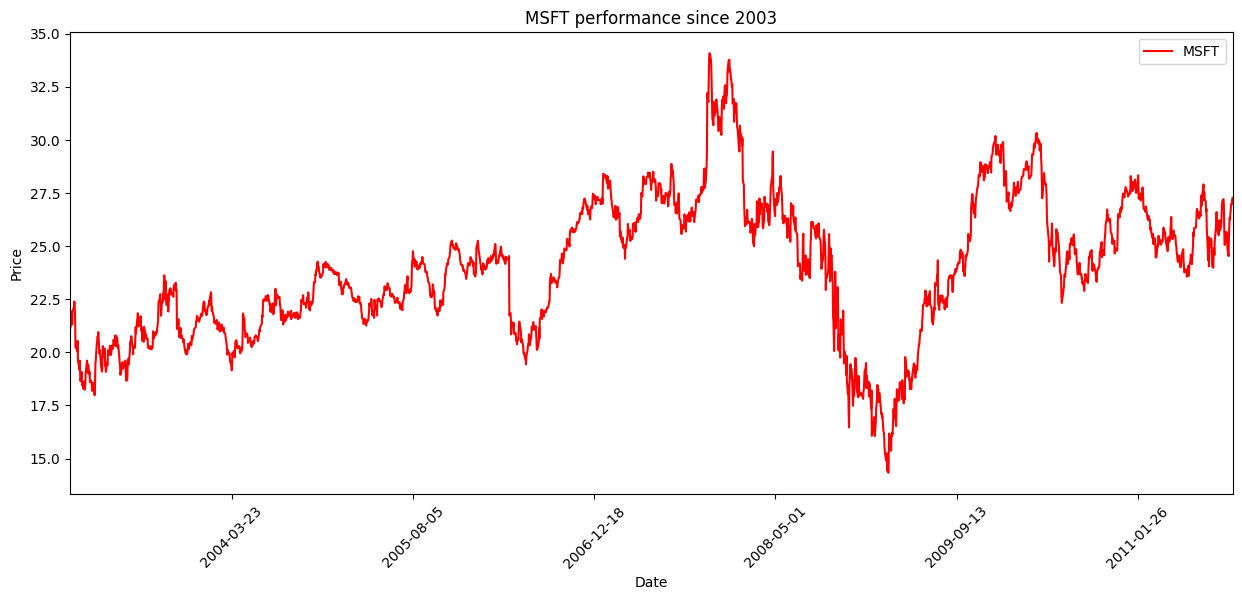

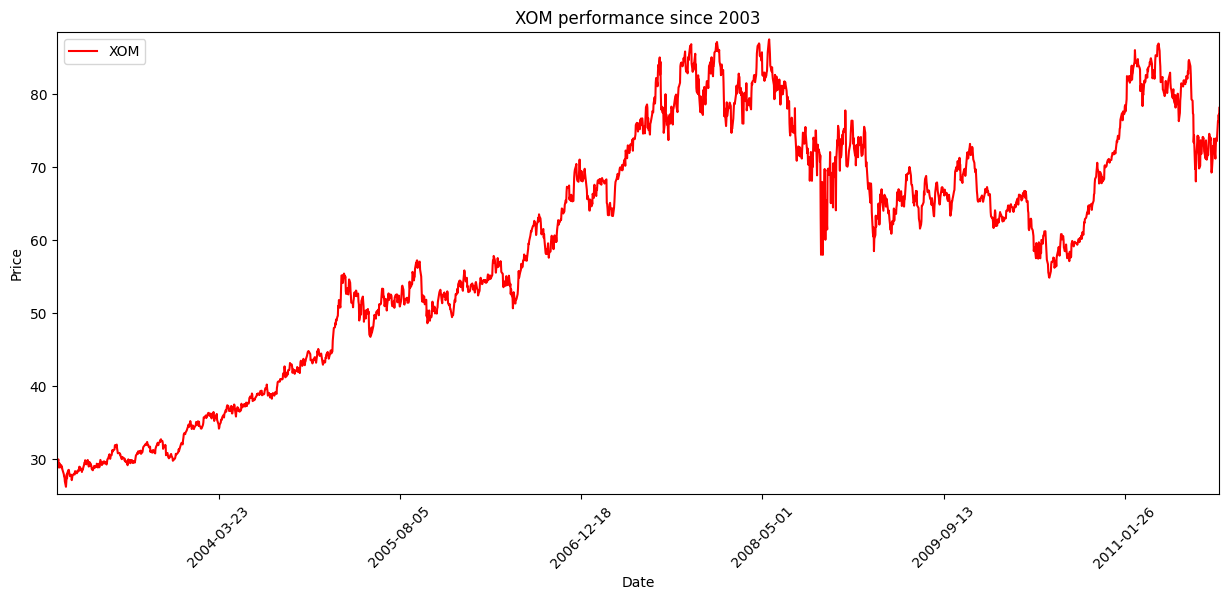

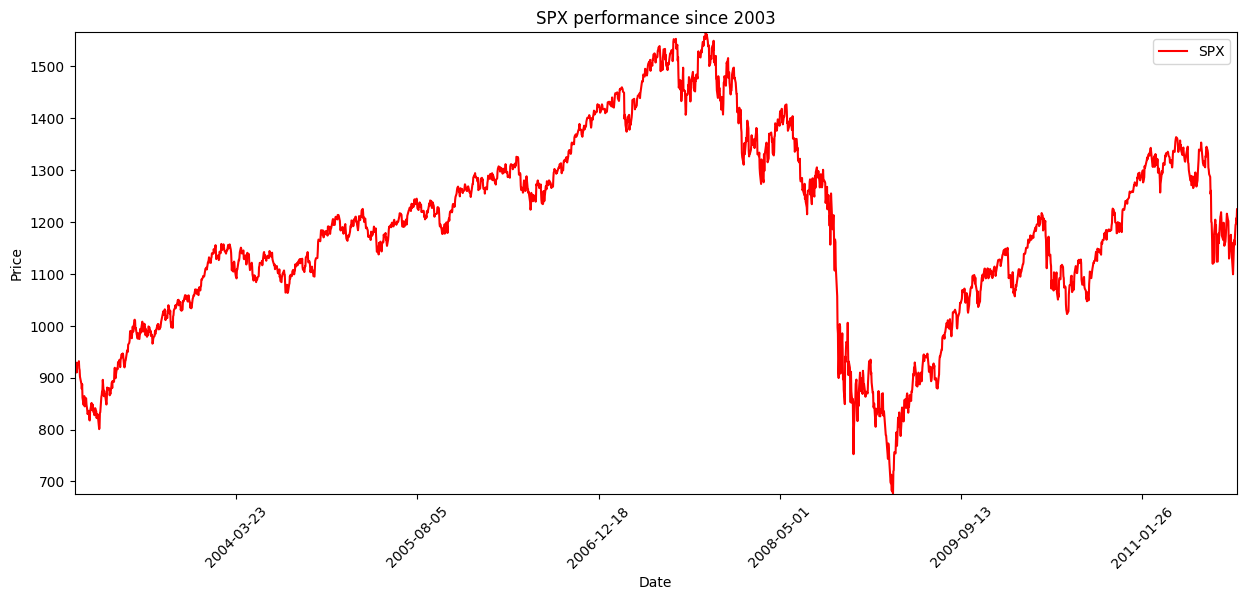

In [80]:
from matplotlib.ticker import AutoLocator


def graph_stocks(*tickers):
    for ticker in tickers:
        ticker = ticker.upper()
    
        plt.figure(figsize = (15,6))
        plt.plot(stock_px_df['Date'], stock_px_df[ticker], label=ticker, color='Red')
        plt.title(ticker + " performance since 2003")
        plt.xlabel("Date")
        plt.ylabel("Price")
        locator = AutoLocator()
        plt.gca().xaxis.set_major_locator(locator)
        plt.xticks(rotation=45)
        plt.ylim(min(stock_px_df[ticker] -1), max(stock_px_df[ticker])+1)
        plt.xlim(min(stock_px_df['Date']), max(stock_px_df['Date']))
        plt.legend()
        plt.show()
        
        

graph_stocks('AAPL','MSFT','XOM','SPX')

###### Number 2
Draw line, scatter, box plot for each of the stocks within the same subplot - 2 points

I was able to use an altered version of my previous function. The indentation of each line was very key here. By removing the indention from the for loop, matplotlib graphed each line that was generated from iterating the graph function across each ticker.

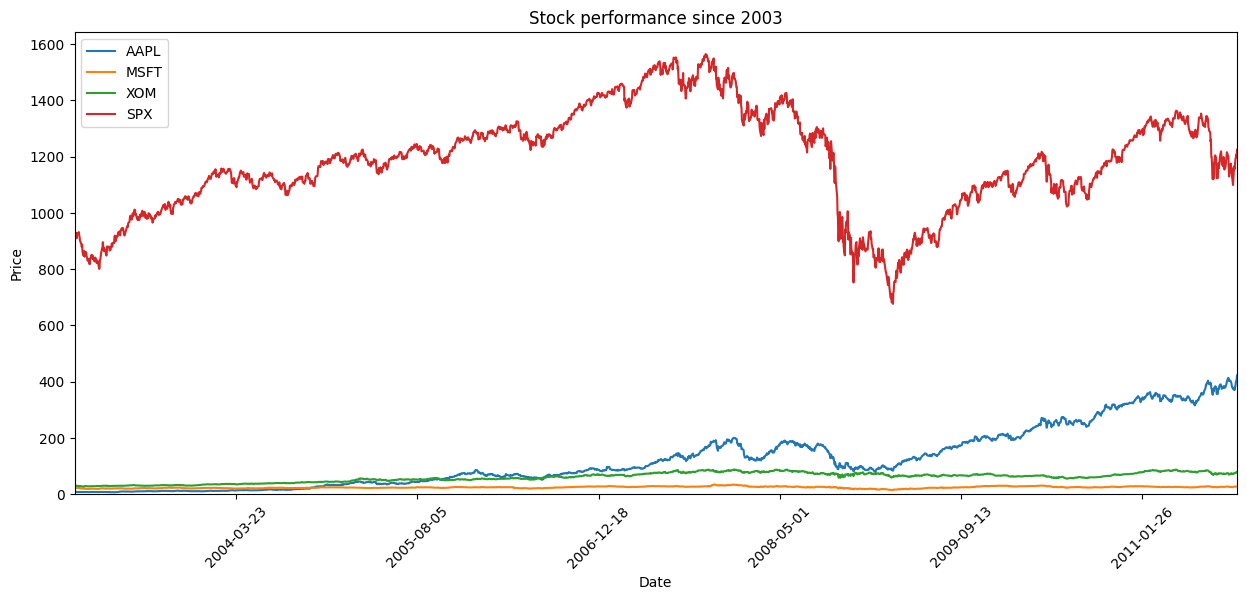

In [81]:
def combo_line_plot(*tickers):
    plt.figure(figsize = (15,6))
    
    for ticker in tickers:
        ticker = ticker.upper() 
        plt.plot(stock_px_df['Date'], stock_px_df[ticker], label=ticker)
    
    plt.title("Stock performance since 2003")
    plt.xlabel("Date")
    plt.ylabel("Price")
    
    locator = AutoLocator()
    plt.gca().xaxis.set_major_locator(locator)
    plt.xticks(rotation=45)
    
    plt.ylim(ymin=0)
    plt.xlim(min(stock_px_df['Date']), max(stock_px_df['Date']))   
    
    plt.legend()
    
    plt.show()
      
combo_line_plot('AAPL','MSFT','XOM','SPX')        

Converting the above function to a scatterplot involved using the plt.scatter function instead of the plt.plot function. I had to change the x- and y- limits slightly. Also,the markersize for the scatter points are large by default. I made them very small since there are many data points.

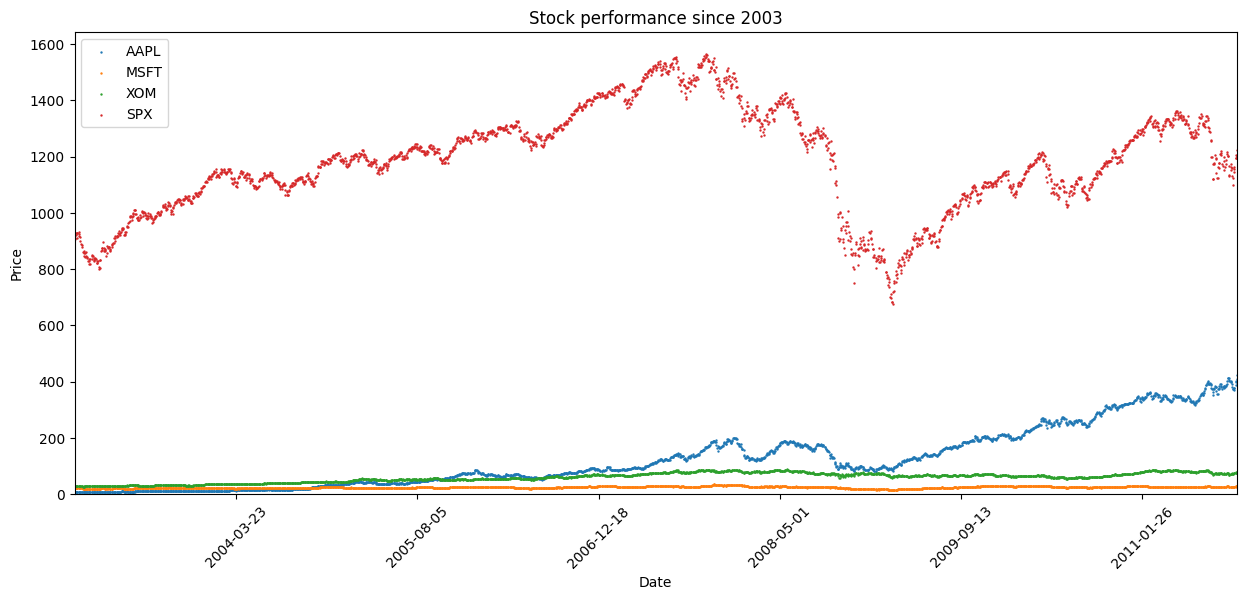

In [82]:
def combo_scatter_plot(*tickers):
    plt.figure(figsize = (15,6))
    
    for ticker in tickers:
        ticker = ticker.upper() 
        plt.scatter(stock_px_df['Date'], stock_px_df[ticker], label=ticker, s=0.5)
    
    plt.title("Stock performance since 2003")
    plt.xlabel("Date")
    plt.ylabel("Price")
    
    locator = AutoLocator()
    plt.gca().xaxis.set_major_locator(locator)
    plt.xticks(rotation=45)
    
    plt.ylim(ymin=0)
    plt.xlim(min(stock_px_df['Date']), max(stock_px_df['Date']))   
    
    plt.legend()
    
    plt.show()
      
combo_scatter_plot('AAPL','MSFT','XOM','SPX')   

This required alot of changes to my function framework. Mainly because the time value is not there. Only price and the price distribution. Because of this, I direct my function below to pull the Series for each ticker that will then be interpreted independent of other columns or data frame characteristics. 

C:\Users\Setup User\AppData\Local\Temp\ipykernel_16464\3470843983.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=tickers)


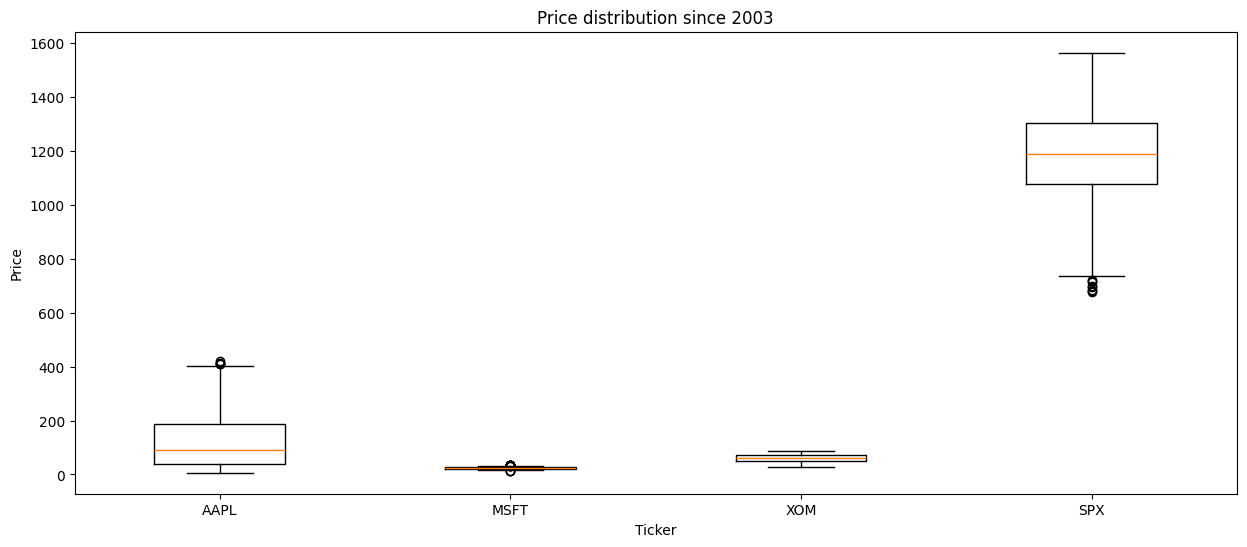

In [83]:
def combo_box_plot(*tickers):
    plt.figure(figsize = (15,6))
    price_data = [stock_px_df[ticker.upper()] for ticker in tickers]
       
    plt.boxplot(price_data, labels=tickers)
    
    plt.title("Price distribution since 2003")
    plt.xlabel("Ticker")
    plt.ylabel("Price")
    
    plt.show()
      
combo_box_plot('AAPL','MSFT','XOM','SPX')   

I realized at this point I read the instructions wrong. I am basically going to be consolidating the 3 functions I created above into 1, then calling it for each ticker.

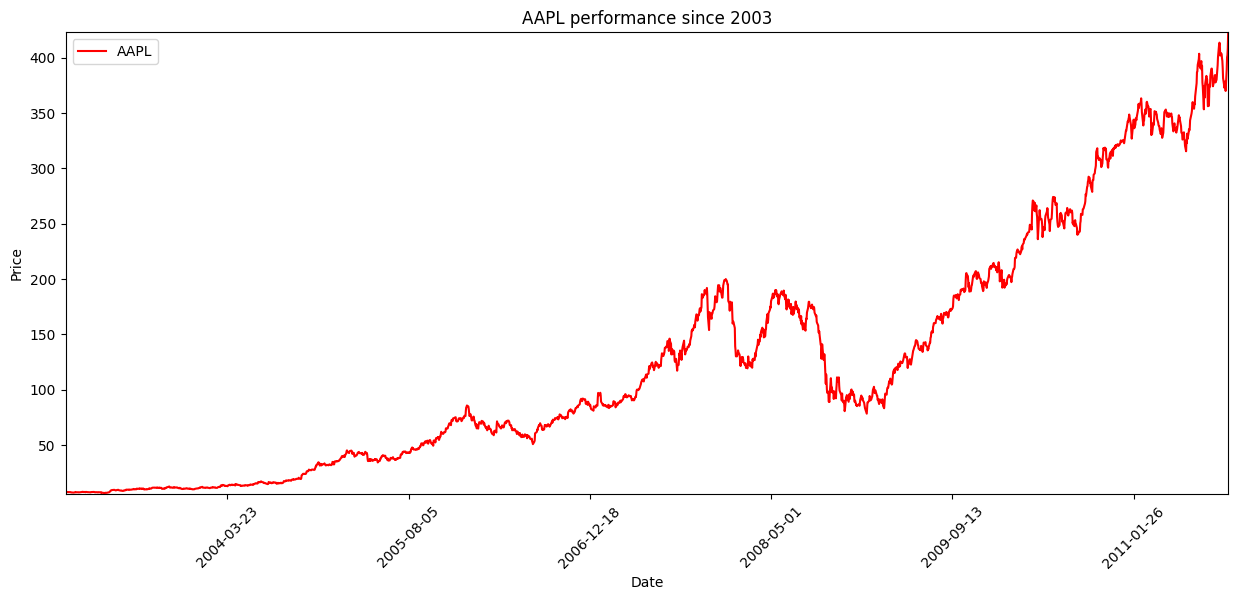

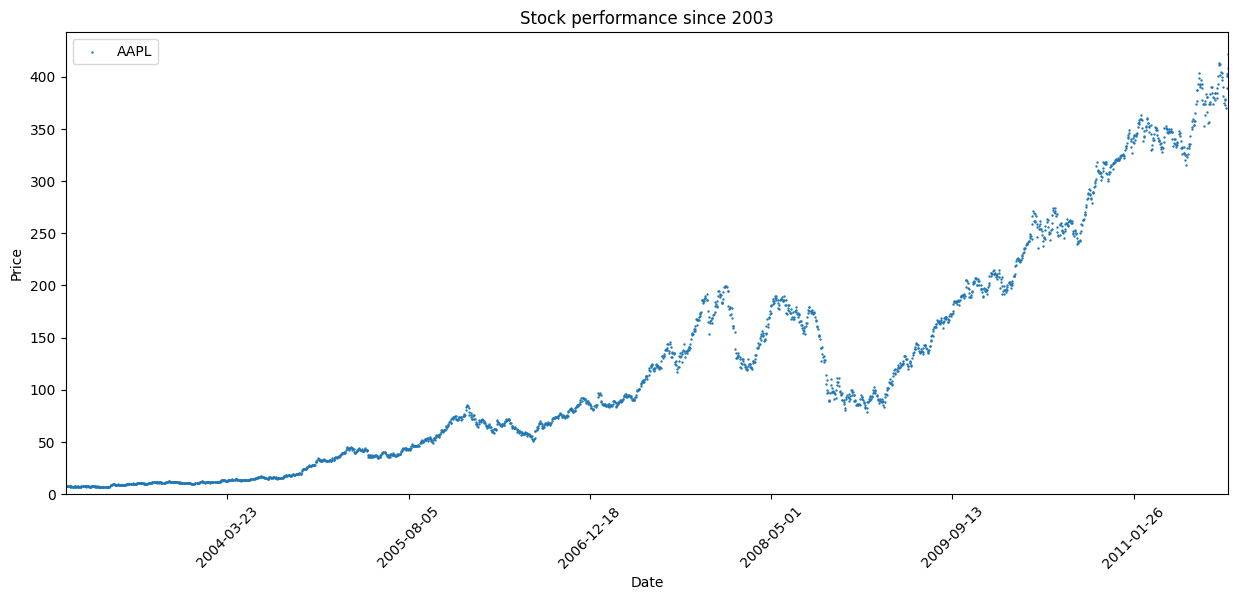

C:\Users\Setup User\AppData\Local\Temp\ipykernel_16464\3470843983.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=tickers)


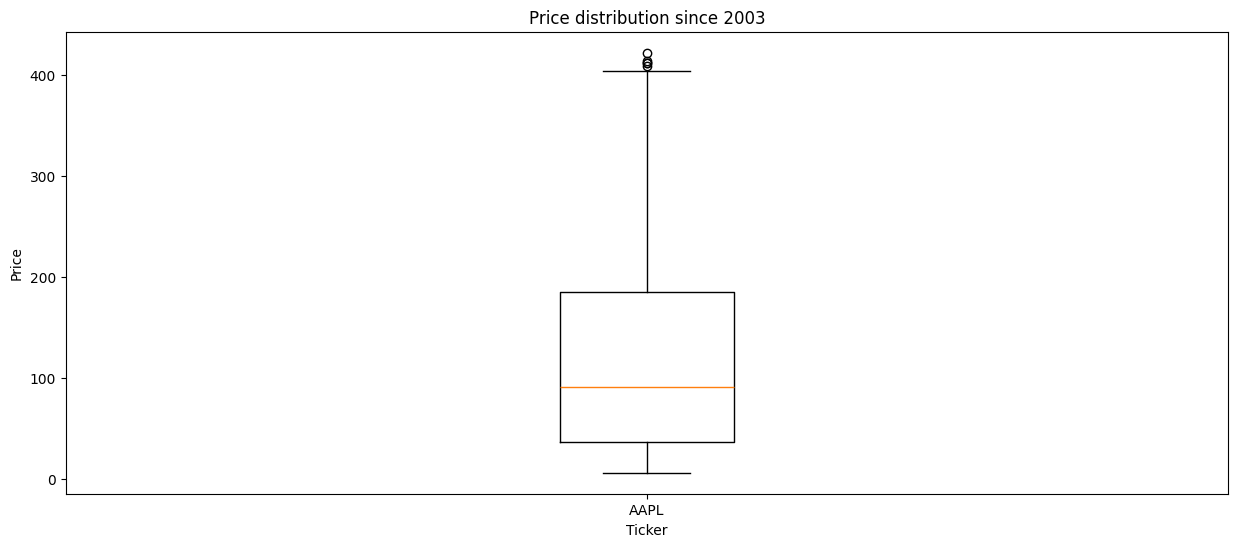

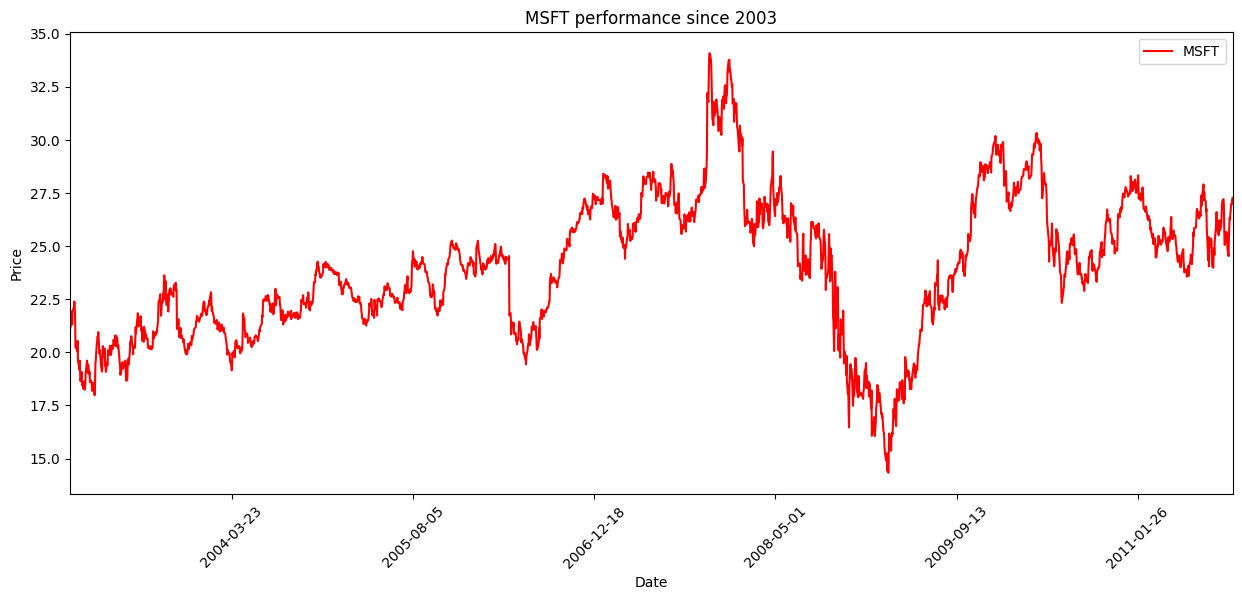

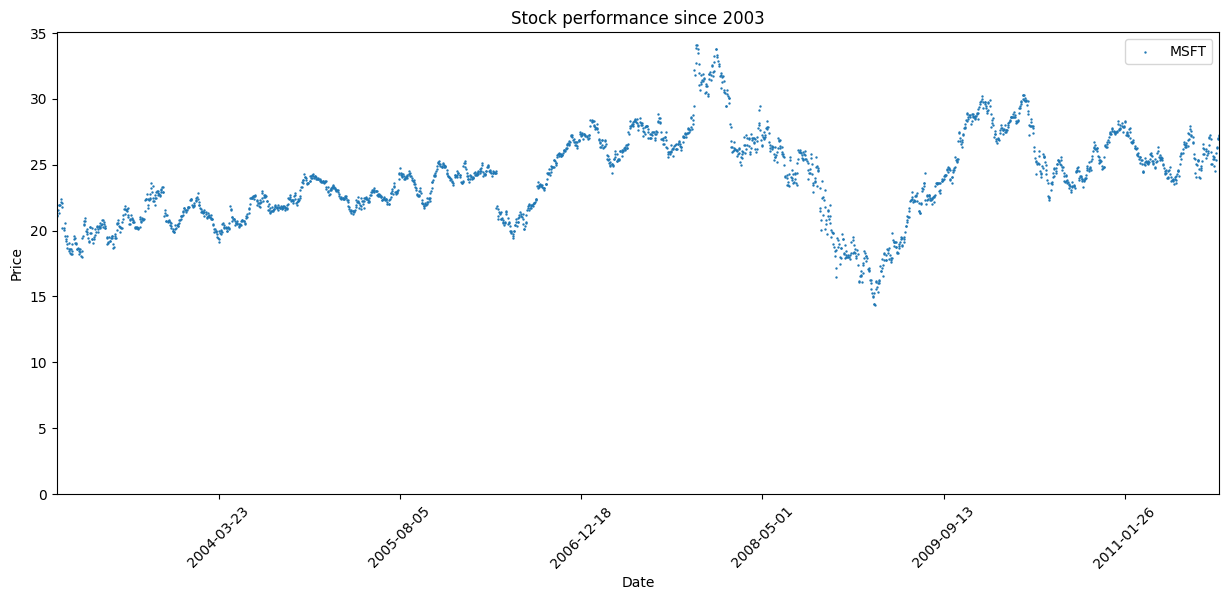

C:\Users\Setup User\AppData\Local\Temp\ipykernel_16464\3470843983.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=tickers)


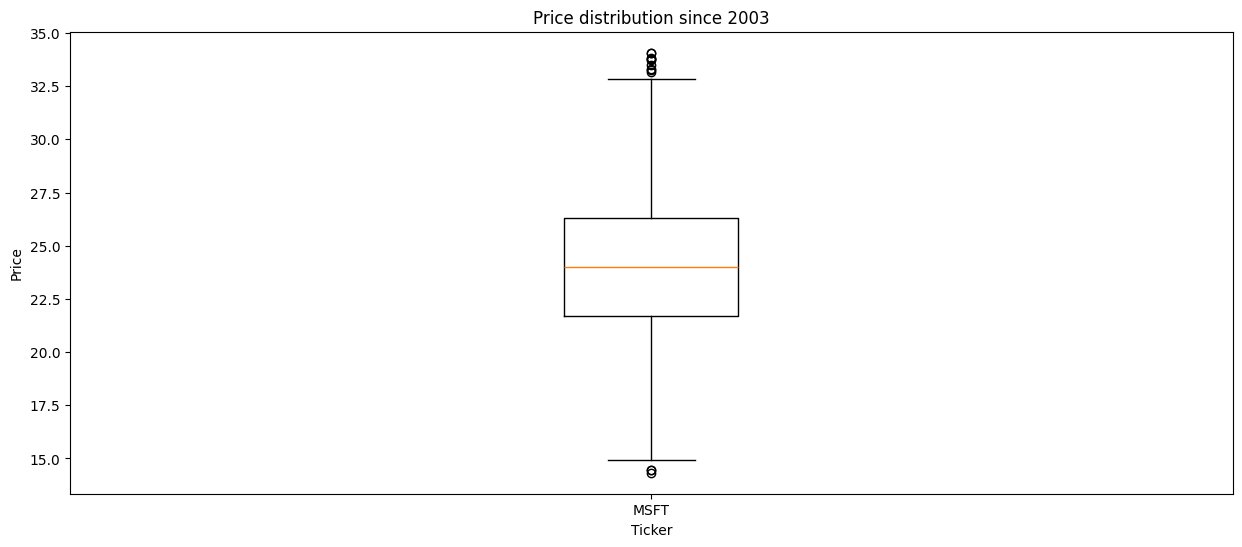

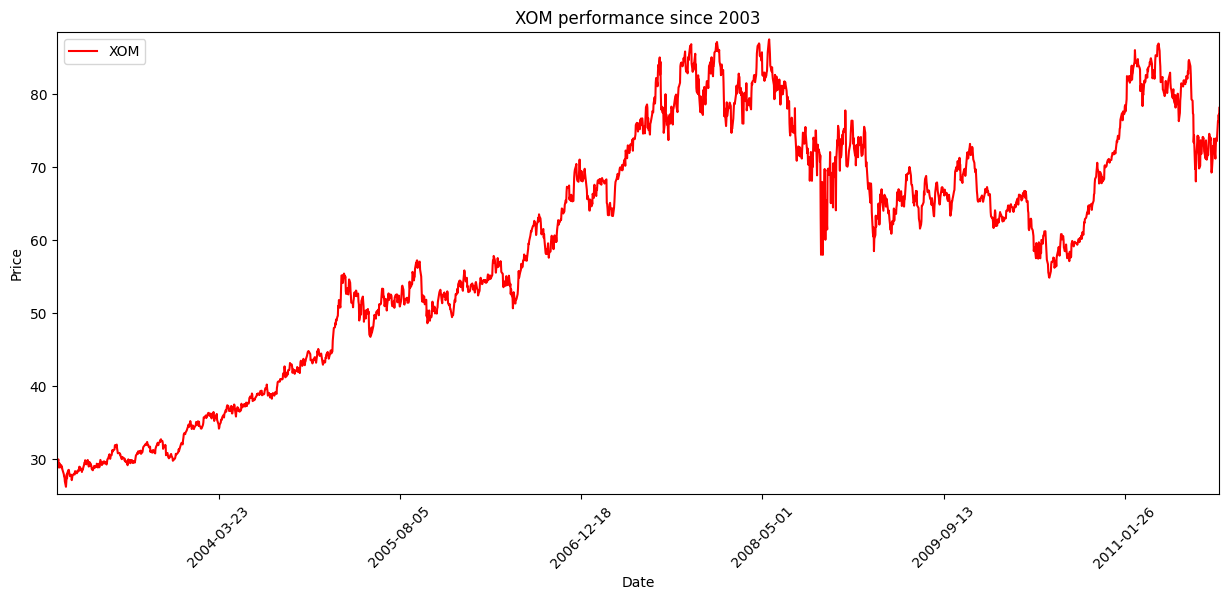

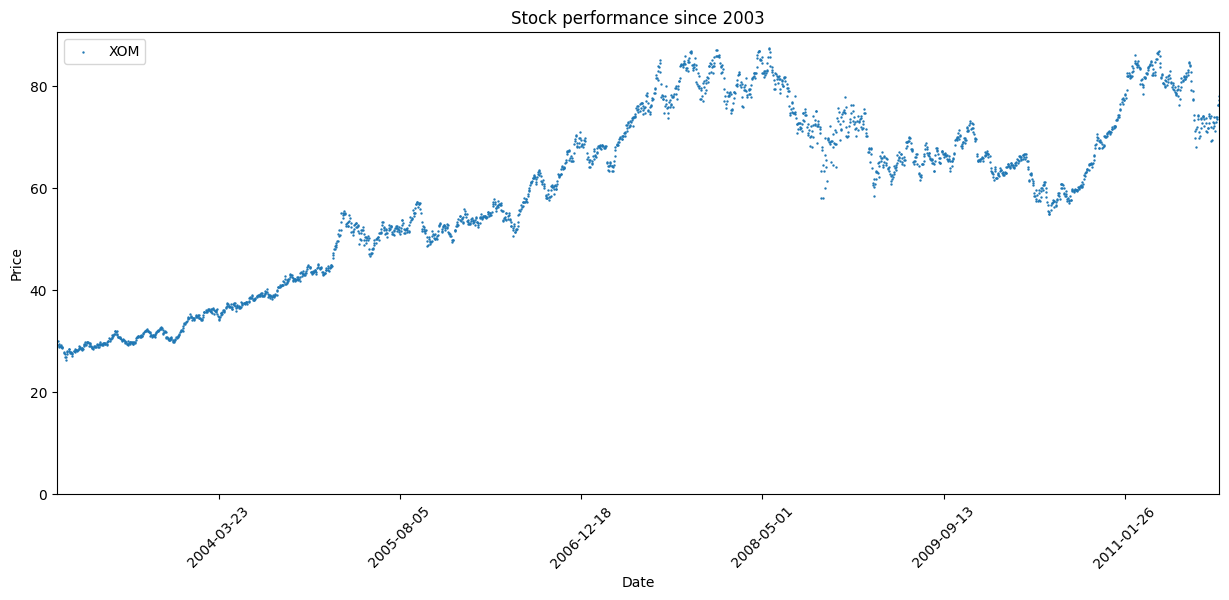

C:\Users\Setup User\AppData\Local\Temp\ipykernel_16464\3470843983.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=tickers)


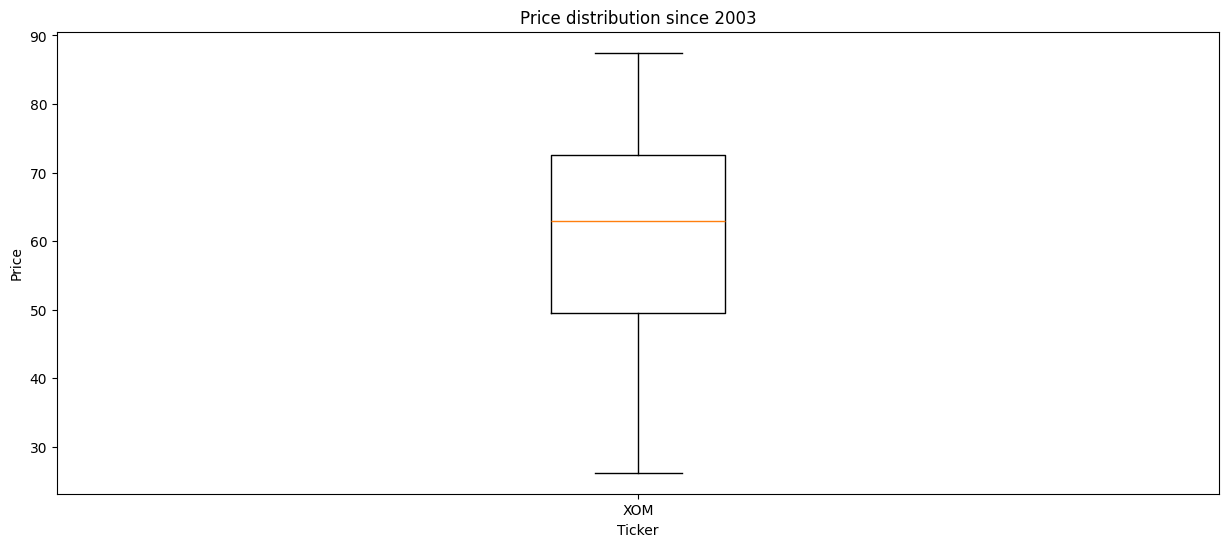

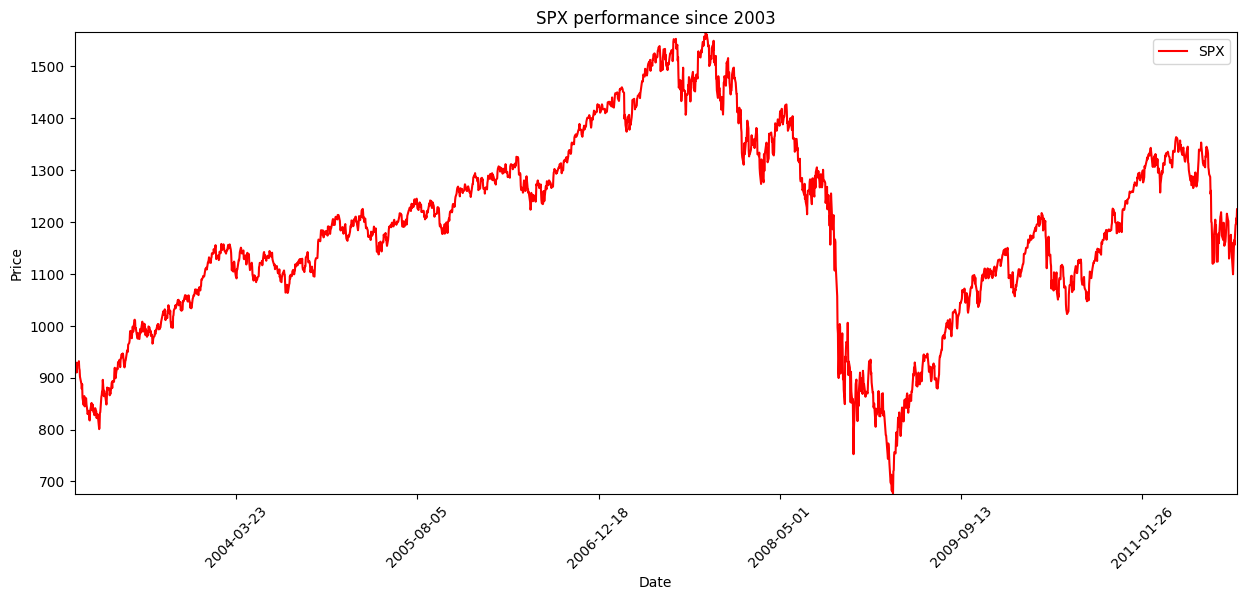

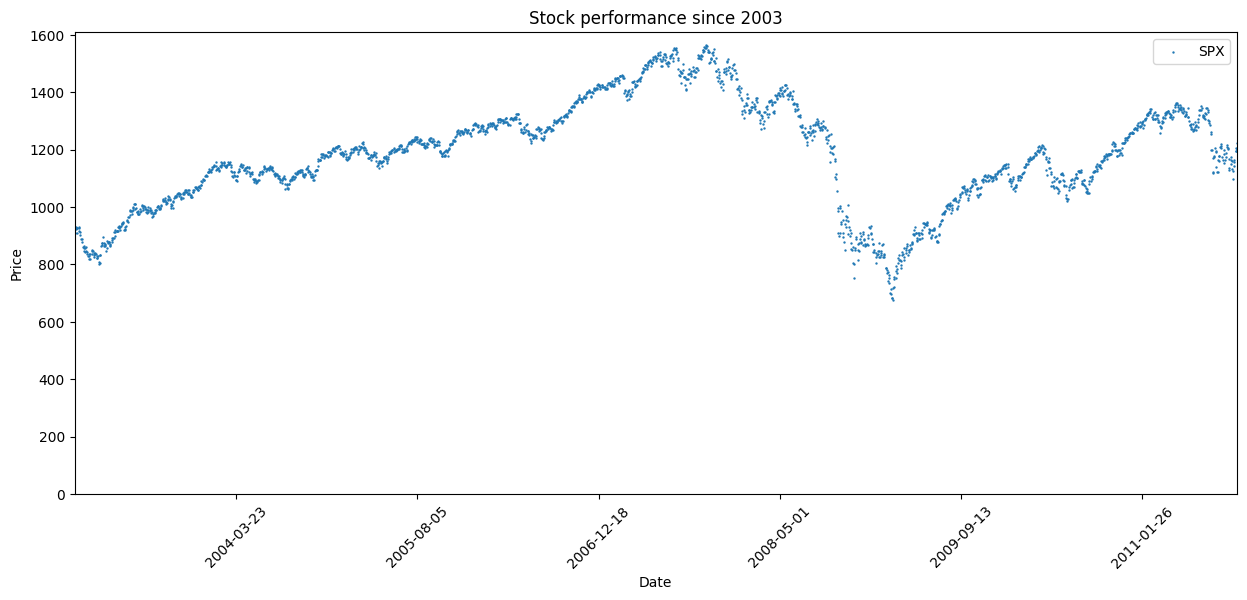

C:\Users\Setup User\AppData\Local\Temp\ipykernel_16464\3470843983.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_data, labels=tickers)


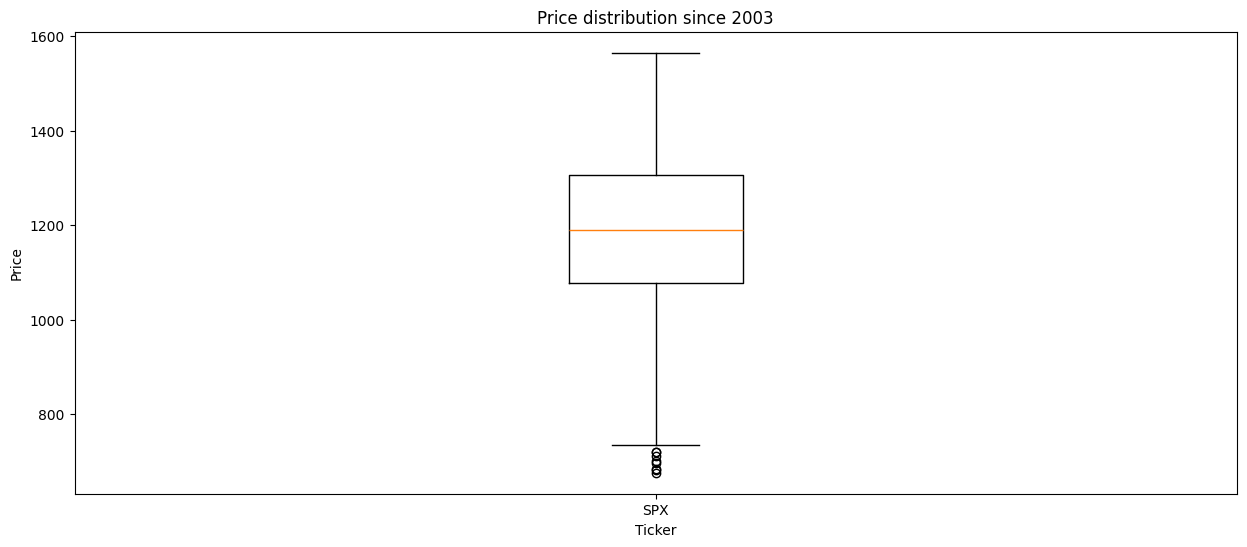

In [84]:
def multiplot(ticker):
    ticker = ticker.upper()
    
    graph_stocks(ticker)
    combo_scatter_plot(ticker)
    combo_box_plot(ticker)

multiplot('AAPL')
multiplot('MSFT')
multiplot('xom')
multiplot('spx')
   

###### Number 3
Draw a linear regression model fit for apple stock - 2 points

* What is trying to be accomplished in this model? The relationship to Apple's price and time. y = b0 +b1x + e

1. First, I need to take the datetime formatted 'Date' column and make it a numerical representation for the independent variable. I do this by adding a new column to the stock_px_df dataframe in case I want to alter the stock in question. Then, the column will be populated with the index's Date and the start date difference. using .days will make the output an integer from a timedelta type.
1. Next, I set my dependent variable to the AAPL price data.
1. The model I used is the ordinary least squares and the command used is fit() and stored in the results object.
1. Next, I use the predict() method on the results object and store the values in a new column to then overlay it on the Apple linegraph. 
1. Finally, I setup my figure and characteristics for the plot.


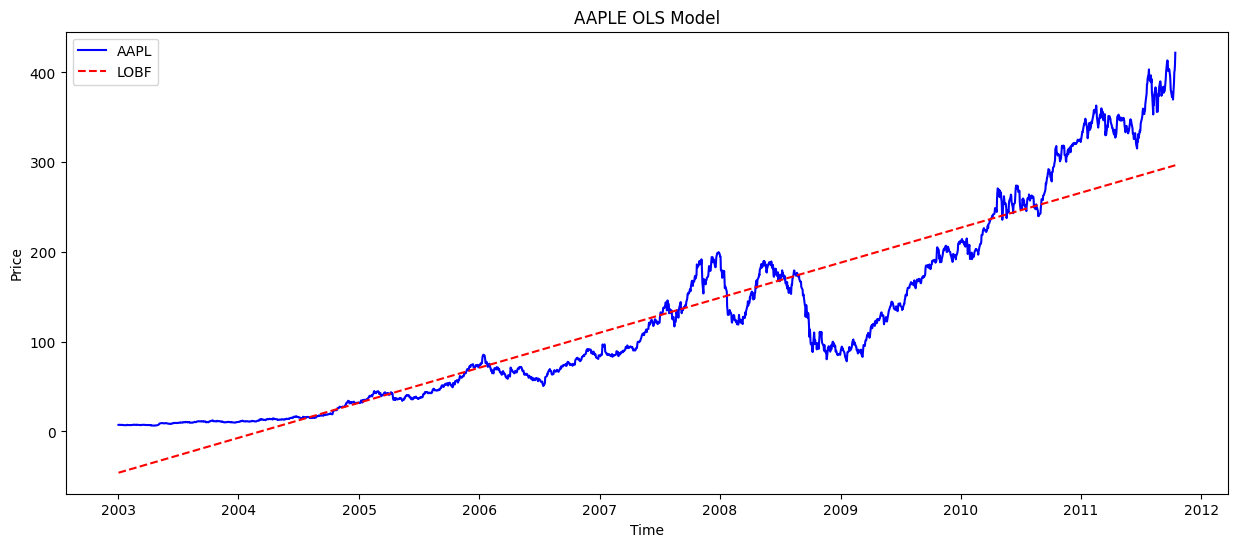

In [85]:
# Using relative path instead of absolute path
regression_data = pd.read_csv('data/stock_px.csv', index_col=0)
regression_data.index = pd.to_datetime(regression_data.index)
regression_data['days'] = (regression_data.index - regression_data.index[0]).days

X = sm.add_constant(regression_data['days'])
y = regression_data['AAPL']

model = sm.OLS(y, X)
results = model.fit()

regression_data['predicted values'] = results.predict(X)

plt.figure(figsize=(15, 6))
plt.plot(regression_data.index, regression_data['AAPL'], label= 'AAPL', color='blue')
plt.plot(regression_data.index, regression_data['predicted values'], label='LOBF', linestyle='--', color='red')
plt.title("AAPLE OLS Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

###### Number 4
Draw a dotted line plot for SPX and mark all the peak points at various timesteps

1. I create a dataframe of the datafile with the 0 column indexed. This allows me to more easily use datetime.
1. I first created my dotted line plot of the SPX prices. 
1. Then, I needed to find the max price for SPX each year. I created the function signify() to locate these significant values.
    1. This function groups the SPX data by year, then finds the max value.
    1. Then, I implement a for loop to interate over groups to find the date/index that matches the peak value for that respective year.
    1. Finally, I put these two lists into a dataframe for easier plotting/comprehension.
1. I then overlay the peak data points using a scatterplot and the newly created dataframe as (x, y) coordinates.

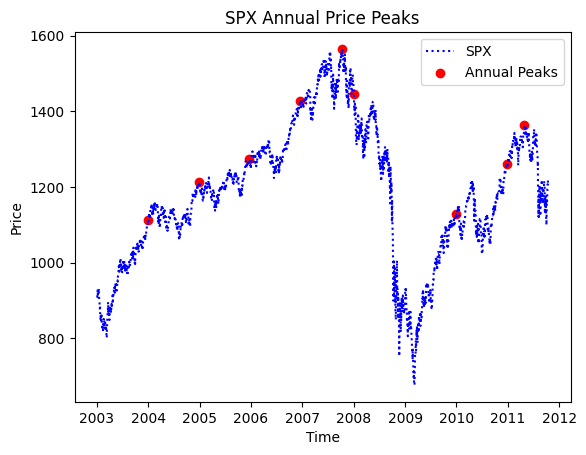

In [86]:
# Using relative path instead of absolute path
peak_data = pd.read_csv('data/stock_px.csv', index_col=0)
peak_data.index = pd.to_datetime(peak_data.index)

def signify():
    peaks = peak_data['SPX'].groupby(peak_data.index.year).max()
    peak_loc = []
    for peak in peaks:
        index = np.where(peak_data['SPX'].values == peak)[0][0]
        peak_loc.append(index)
    return peaks, peak_loc
        
output = signify()

yearly_peaks = pd.DataFrame({'Dates': peak_data.index[output[1]].tolist(),'SPX prices': output[0].values.tolist()})

plt.plot(peak_data.index,peak_data['SPX'], linestyle=':',color='blue',label='SPX')
plt.scatter(yearly_peaks['Dates'],yearly_peaks['SPX prices'], marker='o',label='Annual Peaks',color='red')

plt.title('SPX Annual Price Peaks')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()

###### Number 5
Plot pairwise using Seaborn.

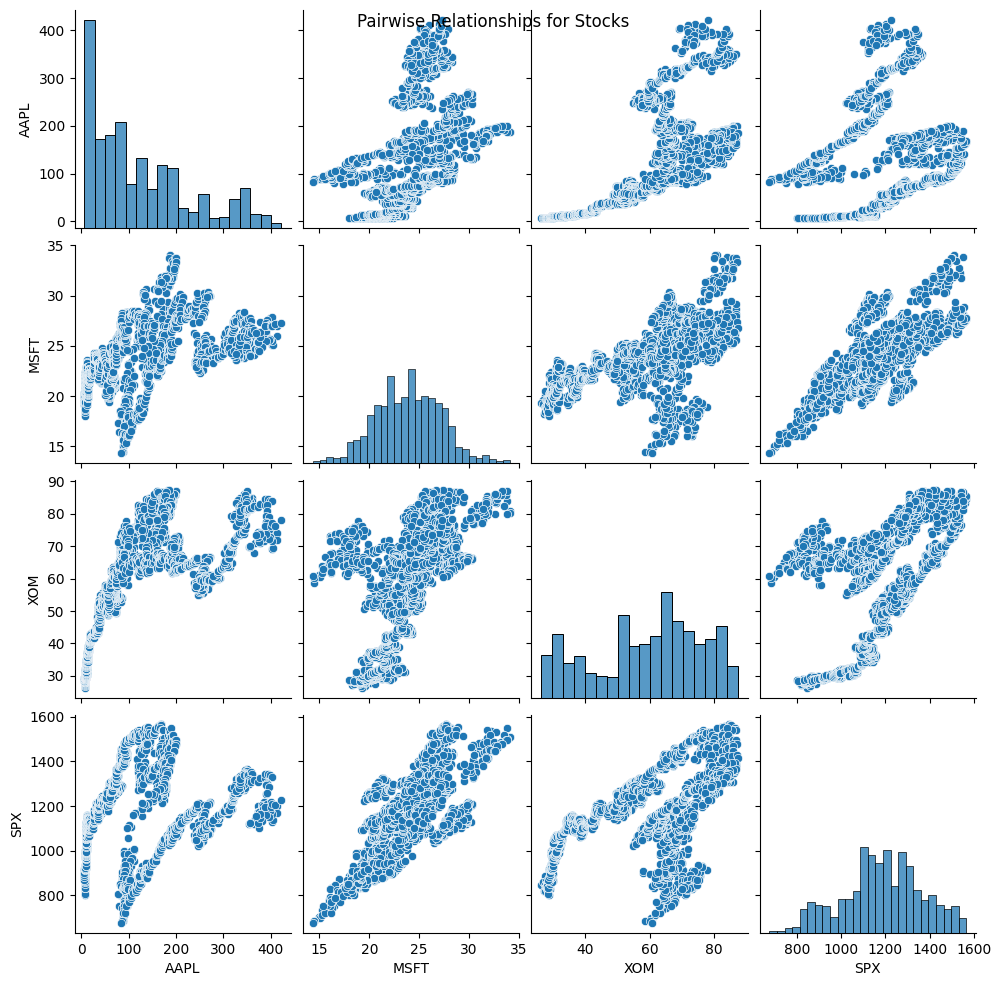

In [87]:
# Using relative path instead of absolute path
seabornpp = pd.read_csv('data/stock_px.csv', index_col=0)
sns.pairplot(seabornpp)
plt.suptitle("Pairwise Relationships for Stocks")
plt.show()

# Part Two
## Use the Tips dataset and address the following functions:

1. Groupby tips on weekdays and weekends - 2 points
2. Groupby smokers on weekdays and weekends  - 2 points
3. Groupby quartiles on total bill  - 2 points
4. Calculate correlation for the following:
    1. Smoker and Tip  - 1 point
    2. Time and Tip  - 1 point
    3. Day and Tip - 1 point
5. Create a pivot table with three levels of index - 1 point

###### Number 1
Groupby tips on weekdays and weekends

1. I create a function that will create boolean values based on if that row is Sunday or Saturday (weekend) or otherwise.
1. Then, I add a new column to my dataframe based on the boolean return.
1. I create a new object that contains the tip totals for those with weekends flagged as True and those flagged as False.

In [88]:
# Using relative path instead of absolute path for tips dataset
tips_df = pd.read_csv('data/tips.csv')

def is_weekend():
    return [day in ['Sun','Sat'] for day in tips_df['day']]

tips_df['weekend'] = is_weekend()
tips_split = tips_df.groupby('weekend')['tip'].sum()
print(tips_split)
tips_df

weekend
False    223.79
True     507.79
Name: tip, dtype: float64


,total_bill,tip,smoker,day,time,size,weekend
0,16.99,1.01,No,Sun,Dinner,2,True
1,10.34,1.66,No,Sun,Dinner,3,True
2,21.01,3.50,No,Sun,Dinner,3,True
3,23.68,3.31,No,Sun,Dinner,2,True
4,24.59,3.61,No,Sun,Dinner,4,True
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,True
240,27.18,2.00,Yes,Sat,Dinner,2,True
241,22.67,2.00,Yes,Sat,Dinner,2,True
242,17.82,1.75,No,Sat,Dinner,2,True


###### Number 2
Groupby smokers on weekdays and weekends 

In [89]:
smoker_split = tips_df.groupby('weekend')['smoker'].value_counts()
smoker_split

weekend  smoker
False    No         49
         Yes        32
True     No        102
         Yes        61
Name: count, dtype: int64

###### Number 3
Groupby quartiles on total bill.

In [90]:
def stats(group):
    # only select numeric columns
    numeric_cols = ['total_bill', 'tip', 'size']
    result = {}
    for col in numeric_cols:
        result[col] = pd.Series({
            "min": group[col].min(), 
            "max": group[col].max(),
            "count": group[col].count(),
            "mean": group[col].mean()
        })
    return pd.DataFrame(result)

tips_df.sort_values('total_bill', inplace=True)
quartile_bill = pd.qcut(tips_df['total_bill'], 4, labels=False)
grouped = tips_df.groupby(quartile_bill)
grouped.apply(stats)


total_bill        tip       size
total_bill                                        
0          min      3.070000   1.000000   1.000000
           max     13.280000   5.150000   3.000000
           count   61.000000  61.000000  61.000000
           mean    10.691967   1.920656   1.967213
1          min     13.370000   1.010000   2.000000
           max     17.780000   4.300000   4.000000
           count   61.000000  61.000000  61.000000
           mean    15.618689   2.609672   2.229508
2          min     17.810000   1.360000   2.000000
           max     24.080000   6.500000   5.000000
           count   61.000000  61.000000  61.000000
           mean    20.498525   3.225246   2.622951
3          min     24.270000   1.170000   2.000000
           max     50.810000  10.000000   6.000000
           count   61.000000  61.000000  61.000000
           mean    32.334590   4.237541   3.459016

###### Number 4
1. Calculate correlation for the following:
    1. Smoker and Tip - 1 point
    1. Time and Tip - 1 point
    1. Day and Tip - 1 point